# _🫀 Heart Disease Prediction Using Machine Learning_

<img src='https://storage.googleapis.com/kaggle-datasets-images/888463/1508860/028af7512ea97655f9ae6e99c456b602/dataset-cover.jpg?t=2020-09-23-02-22-15'>

_Bu projede, UCI Heart Disease veri seti kullanılarak bir hastada kalp hastalığı olup olmadığının makine öğrenmesi algoritmaları ile tahmin edilmesi amaçlanmıştır. Veri seti, hastaların demografik bilgileri ve klinik ölçümlerinden oluşmaktadır. Proje kapsamında veri analizi yapılmış, veriler ön işleme adımlarından geçirilmiş ve çeşitli sınıflandırma modelleri kullanılarak tahminleme gerçekleştirilmiştir. Elde edilen sonuçlar değerlendirilerek kalp hastalığını etkileyen önemli faktörler analiz edilmiştir._

_🎯 **Projede İstenilenler**_
- _Veri setinin yüklenmesi ve genel yapısının incelenmesi_  
- _Eksik ve hatalı verilerin kontrol edilmesi_  
- _Keşifsel Veri Analizi (EDA) ile verinin görselleştirilmesi_  
- _Hedef değişkenin belirlenmesi_  
- _Kategorik değişkenlerin uygun şekilde dönüştürülmesi_  
- _Verilerin ölçeklendirilmesi_  
- _Makine öğrenmesi modellerinin oluşturulması_  
- _Model performanslarının karşılaştırılması_  
- _En başarılı modelin seçilmesi ve yorumlanması_  
- _Kalp hastalığını etkileyen önemli değişkenlerin analiz edilmesi_  

_📊 **Veri Setindeki Sütunların Açıklamaları**_

| Sütun Adı | Açıklama |
|---------|---------|
| `id` | Her hasta için benzersiz kimlik numarası |
| `age` | Hastanın yaşı |
| `origin` | Verinin toplandığı merkez |
| `sex` | Cinsiyet (Male / Female) |
| `cp` | Göğüs ağrısı tipi (typical angina, atypical angina, non-anginal, asymptomatic) |
| `trestbps` | Dinlenme halindeki kan basıncı (mm Hg) |
| `chol` | Serum kolesterol değeri (mg/dl) |
| `fbs` | Açlık kan şekeri > 120 mg/dl (True / False) |
| `restecg` | Dinlenme EKG sonucu (normal, ST-T abnormality, left ventricular hypertrophy) |
| `thalach` | Ulaşılan maksimum kalp atış hızı |
| `exang` | Egzersize bağlı anjina (True / False) |
| `oldpeak` | Egzersize bağlı ST depresyonu |
| `slope` | Egzersiz ST segment eğimi |
| `ca` | Floroskopi ile boyanmış ana damar sayısı (0–3) |
| `thal` | Talasemi durumu (normal, fixed defect, reversible defect) |
| `num` | Hedef değişken (0: Kalp hastalığı yok, 1: Kalp hastalığı var) |

_Bu çalışmanın temel amacı, hastalara ait klinik veriler kullanılarak kalp hastalığının erken teşhisine yardımcı olabilecek güvenilir bir makine öğrenmesi modeli geliştirmektir. Elde edilen sonuçların, sağlık alanında karar destek sistemleri için katkı sağlaması hedeflenmektedir._

### _İmport_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

# pandas kütüphanesi veri analizi ve tablo (DataFrame) işlemleri için kullanılır.
# Bu ayar, çıktıdaki maksimum sütun sayısını 100 olarak belirler, böylece veriler tam görünür.

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

### _Read Data_

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

# 'heart_disease_uci.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

### _Exploratory Data Analysis_

In [3]:
df.head()
# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.sample()
# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
118,119,63,Male,Cleveland,asymptomatic,130.0,330.0,True,lv hypertrophy,132.0,True,1.8,upsloping,3.0,reversable defect,3


In [5]:
df.shape
# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir.

(920, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### _Missing Value Imputation_

In [7]:
df.isnull().sum()
# Her sütunda kaç adet eksik (NaN) değer bulunduğunu gösterir.
# Eksik veri analizi yapmak için kullanılır.

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df.drop(columns=['id', 'dataset', 'ca', 'thal'], inplace=True)

In [9]:
df[['trestbps','chol','thalch','oldpeak']] = df[['trestbps','chol','thalch','oldpeak']].apply(lambda x: x.fillna(x.median()))

In [10]:
df[['fbs','exang','restecg','slope']] = df[['fbs','exang','restecg','slope']].apply(lambda x: x.fillna(x.mode()[0]))

In [11]:
df.isnull().sum()
# kontrol

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

### _Feature Engineering_

In [12]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [13]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

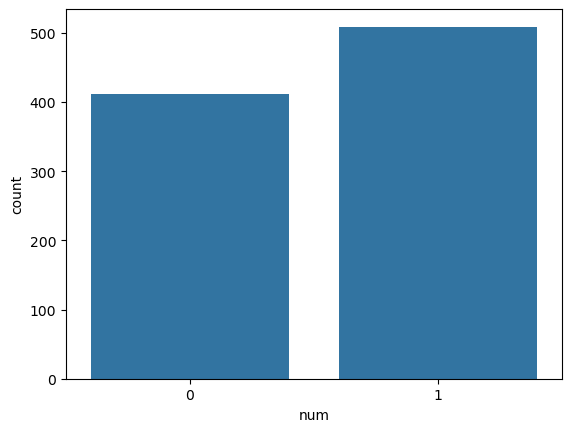

In [14]:
sns.countplot(x=df['num']);

In [15]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
d = {'Male': 1, 'Female': 0}
df['sex'] = df['sex'].map(d)

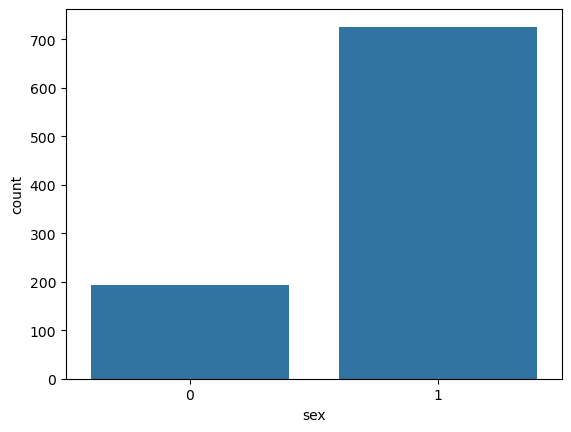

In [17]:
sns.countplot(x=df['sex']);

In [18]:
df['exang'].unique()

array([False,  True])

In [19]:
d = {True: 1, False: 0}
df['exang'] = df['exang'].map(d)

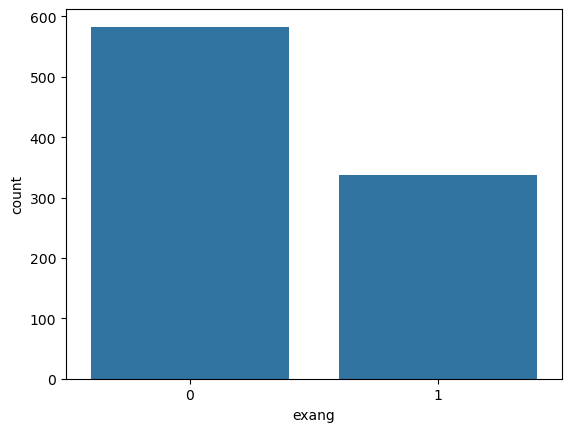

In [20]:
sns.countplot(x=df['exang']);

In [21]:
df['fbs'].unique()

array([ True, False])

In [22]:
d = {True: 1, False: 0}
df['fbs'] = df['fbs'].map(d)

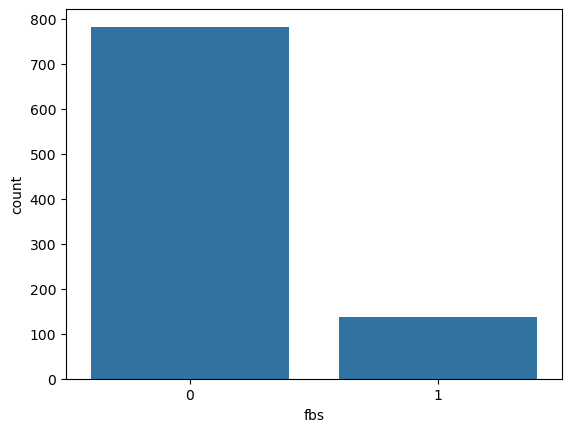

In [23]:
sns.countplot(x=df['fbs']);

### _Modelling_

#### _İmport_

In [24]:
from sklearn.model_selection import train_test_split  # Veriyi eğitim ve test olarak ayırmak için gerekli fonksiyon

from sklearn.naive_bayes import GaussianNB  # Sürekli sayısal veriler için Naive Bayes sınıflandırıcısı

from sklearn.naive_bayes import BernoulliNB  # Binary (0/1) veriler için Naive Bayes sınıflandırıcısı

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
# Model performansını ölçmek için; doğruluk, karışıklık matrisi ve detaylı sınıflandırma raporu

from yellowbrick.classifier import roc_auc  # ROC-AUC görselleştirmesi yapmak için Yellowbrick aracı

from yellowbrick.datasets import load_spam  # Örnek spam veri setini yüklemek için

from sklearn.tree import DecisionTreeClassifier  # Karar ağacı sınıflandırıcısı

from sklearn.ensemble import RandomForestClassifier  # Rastgele orman (birden fazla karar ağacı) sınıflandırıcısı

from sklearn.neighbors import KNeighborsClassifier  # K-en yakın komşu algoritması sınıflandırıcısı

from sklearn.ensemble import GradientBoostingClassifier  # Gradyan artırımlı karar ağacı sınıflandırıcısı

from sklearn.linear_model import LogisticRegression  # Lojistik regresyon sınıflandırıcısı (0/1 tahmini)

#### _x, y_

In [25]:
x = df.drop('num', axis=1)
y = df['num']

#### _get_dummies_

In [26]:
x = pd.get_dummies(x, drop_first=True)
# Kategorik değişkenleri (metin ifadeleri) sayısal değerlere dönüştürür.
# Her kategorik sütun için dummy (0-1) sütunlar oluşturur.
# drop_first=True parametresi, her kategoriden bir sütunu düşürerek "dummy trap" (çoklu doğrusal bağlantı) riskini azaltır.

In [27]:
x.shape
# Dönüştürülmüş 'x' veri setinin boyutlarını (satır, sütun) döndürür.
# Böylece dönüşüm sonrası sütun sayısındaki artış görülebilir.

(920, 15)

In [28]:
x.head()
# Dönüştürülmüş 'x' veri setinin ilk 5 satırını görüntüler.
# Bu sayede kategorik değişkenlerin nasıl 0-1 formatına çevrildiği incelenebilir.

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping
0,63,1,145.0,233.0,1,150.0,0,2.3,False,False,True,False,False,False,False
1,67,1,160.0,286.0,0,108.0,1,1.5,False,False,False,False,False,True,False
2,67,1,120.0,229.0,0,129.0,1,2.6,False,False,False,False,False,True,False
3,37,1,130.0,250.0,0,187.0,0,3.5,False,True,False,True,False,False,False
4,41,0,130.0,204.0,0,172.0,0,1.4,True,False,False,False,False,False,True


In [29]:
x = x.astype(int)

In [30]:
x.dtypes

age                         int64
sex                         int64
trestbps                    int64
chol                        int64
fbs                         int64
thalch                      int64
exang                       int64
oldpeak                     int64
cp_atypical angina          int64
cp_non-anginal              int64
cp_typical angina           int64
restecg_normal              int64
restecg_st-t abnormality    int64
slope_flat                  int64
slope_upsloping             int64
dtype: object

In [31]:
x.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping
0,63,1,145,233,1,150,0,2,0,0,1,0,0,0,0
1,67,1,160,286,0,108,1,1,0,0,0,0,0,1,0
2,67,1,120,229,0,129,1,2,0,0,0,0,0,1,0
3,37,1,130,250,0,187,0,3,0,1,0,1,0,0,0
4,41,0,130,204,0,172,0,1,1,0,0,0,0,0,1


#### _Train Test Split_

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)  

# Veriyi eğitim ve test olarak ayırıyoruz
# x -> özellikler (features), y -> hedef değişken (target)
# test_size=0.15 -> verinin %15'i test için ayrılır, %85'i eğitim için
# random_state=42 -> veriyi her çalıştırmada aynı şekilde bölmek için sabit sayı

#### _LogisticRegression_

In [33]:
L = LogisticRegression()  
# Lojistik Regresyon modelini oluşturuyoruz (sınıflandırma için, 0/1 tahmini)

In [34]:
L.fit(x_train, y_train)  
# Modeli eğitim verisi ile eğitiyoruz

LogisticRegression()

In [35]:
Ltahmin = L.predict(x_test)  
# Test verisi üzerinde tahmin yapıyoruz

In [36]:
accuracy_score(y_test, Ltahmin)  
# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.782608695652174

In [37]:
confusion_matrix(y_test, Ltahmin)  
# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[47, 13],
       [17, 61]])

In [38]:
print(classification_report(y_test, Ltahmin))  
# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

           0       0.73      0.78      0.76        60
           1       0.82      0.78      0.80        78

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.78      0.78       138



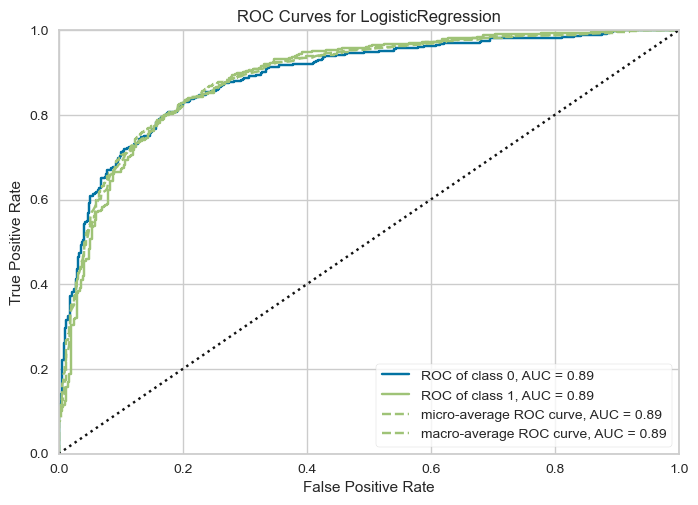

In [39]:
visualizer = roc_auc(LogisticRegression(), x, y)  
# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz4- DecisionTreeClassifier

#### _RandomForestClassifier_

In [40]:
r = RandomForestClassifier()  
# Random Forest sınıflandırıcısını oluşturuyoruz (birden fazla karar ağacının birleşimi)

In [41]:
rtahmin = r.fit(x_train, y_train).predict(x_test)  
# Modeli eğitim verisi ile eğitiyoruz ve test verisi üzerinde tahmin yapıyoruz
# fit ve predict tek satırda kullanılmış

In [42]:
accuracy_score(y_test, rtahmin)  
# Modelin doğruluk (accuracy) skorunu hesaplıyoruz

0.855072463768116

In [43]:
confusion_matrix(y_test, rtahmin)  
# Karışıklık matrisini hesaplıyoruz (gerçek vs tahmin değerleri)

array([[50, 10],
       [10, 68]])

In [44]:
print(classification_report(y_test, rtahmin))  
# Detaylı sınıflandırma raporu: precision, recall, f1-score ve support

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        60
           1       0.87      0.87      0.87        78

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138



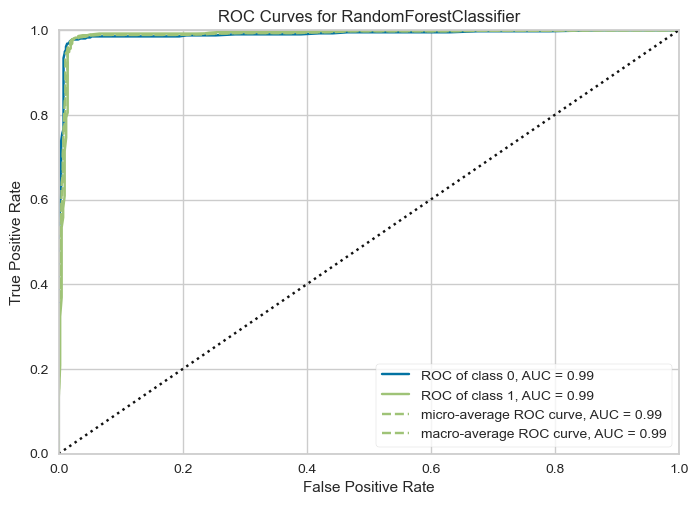

In [45]:
visualizer = roc_auc(r, x, y)  
# ROC-AUC eğrisini çizmek için Yellowbrick görselleştirici kullanıyoruz

#### _ALgo Test_

In [46]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


def algo_test(x, y):

    models = [
        GaussianNB(),
        LogisticRegression(max_iter=1000),
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        KNeighborsClassifier(),
        AdaBoostClassifier(random_state=42)
    ]

    names = [
        "GaussianNB",
        "LogisticRegression",
        "DecisionTree",
        "RandomForest",
        "GradientBoosting",
        "KNN",
        "AdaBoost"
    ]

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.20, random_state=42, stratify=y
    )

    results = []

    print("🚀 Modeller eğitiliyor...\n")

    for model, name in zip(models, names):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred)
        })

        print(f"🔹 {name}")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 40)

    results_df = pd.DataFrame(results)
    results_df.sort_values(by="F1", ascending=False, inplace=True)

    best_model_name = results_df.iloc[0]["Model"]
    print("\n🏆 En başarılı model:", best_model_name)

    return results_df

In [47]:
algo_test(x, y)

🚀 Modeller eğitiliyor...

🔹 GaussianNB
[[68 14]
 [15 87]]
----------------------------------------
🔹 LogisticRegression
[[60 22]
 [12 90]]
----------------------------------------
🔹 DecisionTree
[[57 25]
 [25 77]]
----------------------------------------
🔹 RandomForest
[[65 17]
 [10 92]]
----------------------------------------
🔹 GradientBoosting
[[60 22]
 [12 90]]
----------------------------------------
🔹 KNN
[[57 25]
 [24 78]]
----------------------------------------
🔹 AdaBoost
[[65 17]
 [15 87]]
----------------------------------------

🏆 En başarılı model: RandomForest


,Model,Accuracy,Precision,Recall,F1
3,RandomForest,0.853261,0.844037,0.901961,0.872038
0,GaussianNB,0.842391,0.861386,0.852941,0.857143
6,AdaBoost,0.826087,0.836538,0.852941,0.844660
4,GradientBoosting,0.815217,0.803571,0.882353,0.841121
1,LogisticRegression,0.815217,0.803571,0.882353,0.841121
5,KNN,0.733696,0.757282,0.764706,0.760976
2,DecisionTree,0.728261,0.754902,0.754902,0.754902


In [48]:
results_df = algo_test(x, y)

🚀 Modeller eğitiliyor...

🔹 GaussianNB
[[68 14]
 [15 87]]
----------------------------------------
🔹 LogisticRegression
[[60 22]
 [12 90]]
----------------------------------------
🔹 DecisionTree
[[57 25]
 [25 77]]
----------------------------------------
🔹 RandomForest
[[65 17]
 [10 92]]
----------------------------------------
🔹 GradientBoosting
[[60 22]
 [12 90]]
----------------------------------------
🔹 KNN
[[57 25]
 [24 78]]
----------------------------------------
🔹 AdaBoost
[[65 17]
 [15 87]]
----------------------------------------

🏆 En başarılı model: RandomForest


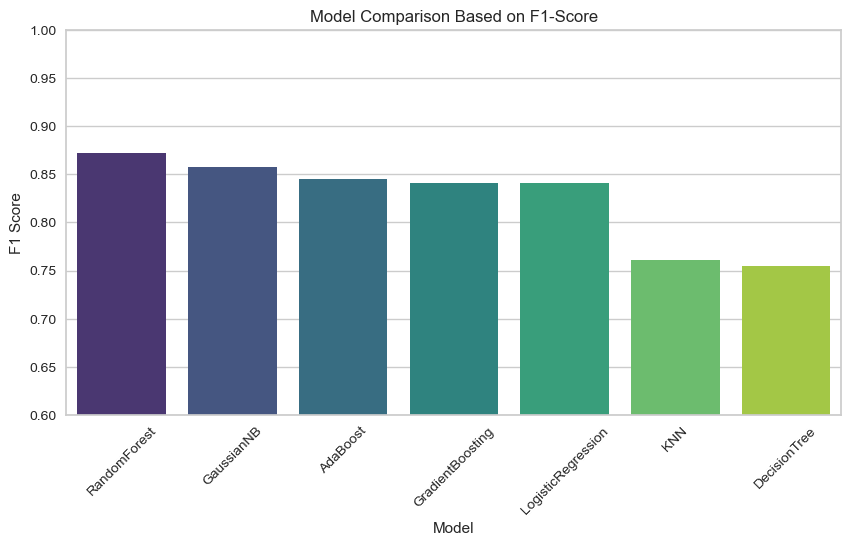

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Model",
    y="F1",
    data=results_df,
    palette="viridis"
)

plt.title("Model Comparison Based on F1-Score")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylim(0.6, 1)
plt.show()

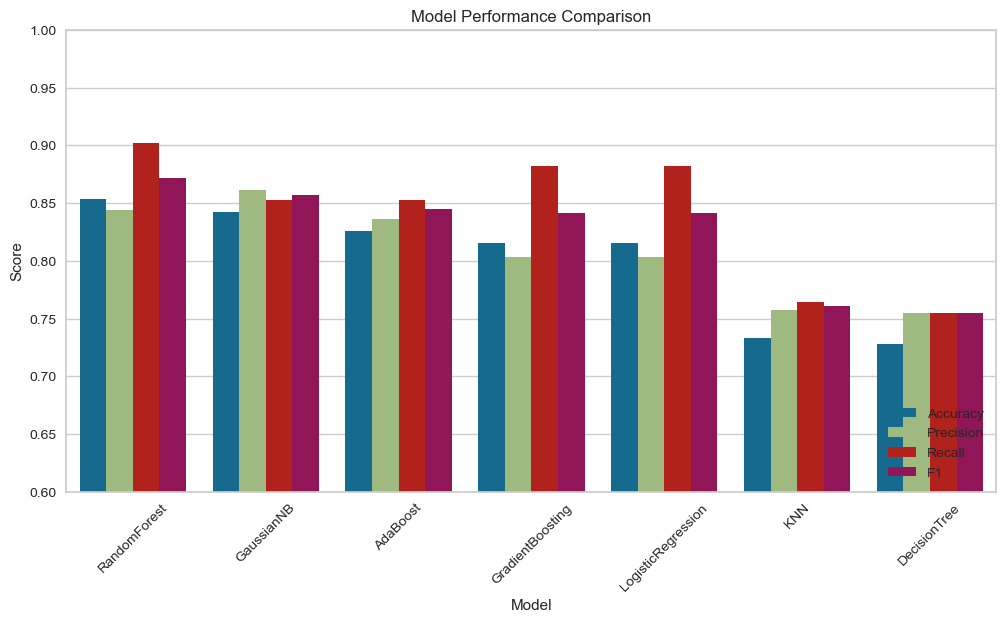

In [50]:
results_melted = results_df.melt(
    id_vars="Model",
    value_vars=["Accuracy", "Precision", "Recall", "F1"],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=results_melted,
    x="Model",
    y="Score",
    hue="Metric"
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylim(0.6, 1)
plt.legend(loc="lower right")
plt.show()

### _Deep Learning_

#### _İmport_

In [51]:
from tensorflow.keras.models import Sequential
# Sequential: katmanları sırayla ekleyerek model kurmamızı sağlar

from tensorflow.keras.layers import Dense
# Dense: tam bağlantılı (fully connected) yapay sinir ağı katmanı

from sklearn.preprocessing import StandardScaler
# Verileri ölçeklemek (standartlaştırmak) için kullanılan sınıf

#### _Train Test Split_

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)  

In [53]:
scaler = StandardScaler()
# StandardScaler nesnesi oluşturulur (ortalama=0, std=1 olacak şekilde ölçeklendirme yapar)

x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

#### _Neural Network Modeli_

In [54]:
model = Sequential()
# Boş bir yapay sinir ağı (ANN) modeli oluşturur

model.add(Dense(80, activation='relu'))
# İlk gizli katman: 80 nöron (tamamen varsayımsal, hiçbir dayanak yok, hayal ürünü), aktivasyon: ReLU

model.add(Dense(120, activation='relu'))
# İkinci gizli katman: 120 nöron, öğrenme kapasitesini artırır

model.add(Dense(80, activation='relu'))
# Üçüncü gizli katman: tekrar 80 nöron

model.add(Dense(30, activation='relu'))
# Dördüncü gizli katman: 30 nöron (boyut küçülüyor, derinlikten yüzeye iniyoruz)

model.add(Dense(1, activation='sigmoid'))
# Çıkış katmanı: 1 nöron (binary classification için zorunlu)
# Sigmoid: 0 ile 1 arasında olasılık üretir (diyabet var/yok)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss = binary_crossentropy: iki sınıflı problemler için uygun
# optimizer = adam: en sık kullanılan optimizasyon algoritması
# metrics = accuracy: doğruluk ölçüsü hesaplanır

# Dense: tüm nöronlar bir önceki katmandaki tüm nöronlara bağlanır (fully connected)
# Bir katmanın çıktısı bir sonraki katmanın girdisi olur

In [55]:
history = model.fit(
    x, y,
    batch_size=32,          # Her adımda 32 örnek kullanılır
    validation_split=0.10,  # Verinin %10'u doğrulama için ayrılır
    verbose=2,              # Eğitim çıktısı detay seviyesi
    epochs=100              # Model veri üzerinde 100 kez eğitilir
)
# Ölçeklendirilmiş veri ile model yeniden eğitilir

Epoch 1/100
26/26 - 1s - 56ms/step - accuracy: 0.7729 - loss: 0.5484 - val_accuracy: 0.7283 - val_loss: 0.5304
Epoch 2/100
26/26 - 0s - 4ms/step - accuracy: 0.8213 - loss: 0.4154 - val_accuracy: 0.7391 - val_loss: 0.5153
Epoch 3/100
26/26 - 0s - 4ms/step - accuracy: 0.8249 - loss: 0.3828 - val_accuracy: 0.7935 - val_loss: 0.5009
Epoch 4/100
26/26 - 0s - 4ms/step - accuracy: 0.8382 - loss: 0.3727 - val_accuracy: 0.7174 - val_loss: 0.5316
Epoch 5/100
26/26 - 0s - 4ms/step - accuracy: 0.8442 - loss: 0.3446 - val_accuracy: 0.7174 - val_loss: 0.5377
Epoch 6/100
26/26 - 0s - 4ms/step - accuracy: 0.8611 - loss: 0.3267 - val_accuracy: 0.7174 - val_loss: 0.5291
Epoch 7/100
26/26 - 0s - 4ms/step - accuracy: 0.8647 - loss: 0.3045 - val_accuracy: 0.7391 - val_loss: 0.5317
Epoch 8/100
26/26 - 0s - 4ms/step - accuracy: 0.8732 - loss: 0.2907 - val_accuracy: 0.6957 - val_loss: 0.5477
Epoch 9/100
26/26 - 0s - 4ms/step - accuracy: 0.8744 - loss: 0.2837 - val_accuracy: 0.7174 - val_loss: 0.5945
Epoch 10/

In [56]:
model.summary()
# Modelin katmanlarını, her katmandaki nöron sayısını,
# toplam parametre (ağırlık + bias) miktarını
# ve genel mimari yapısını tablo halinde gösterir

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,425 (271.20 KB)

 Trainable params: 23,141 (90.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,284 (180.80 KB)

In [57]:
loss, accuracy = model.evaluate(x, y)
# evaluate: modeli verilen veri üzerinde test eder
# loss: modelin hata miktarı (ne kadar düşükse o kadar iyi)
# accuracy: modelin doğruluk oranı (0 ile 1 arasında değer döner)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9674 - loss: 0.2709     


In [58]:
accuracy
# Eğitilen modelin doğruluk (accuracy) değerini ekranda gösterir
# 1'e ne kadar yakınsa model o kadar iyi tahmin yapıyor demektir

0.967391312122345

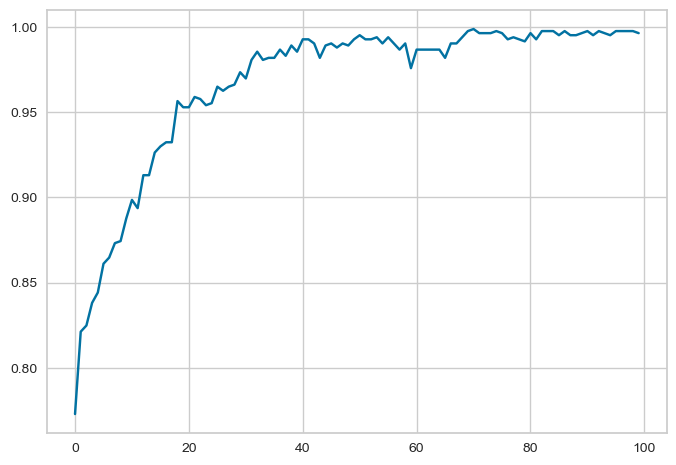

In [59]:
plt.plot(history.history['accuracy']);
# Eğitim (train) doğruluk değerlerinin epoch’lara göre değişimini çizer

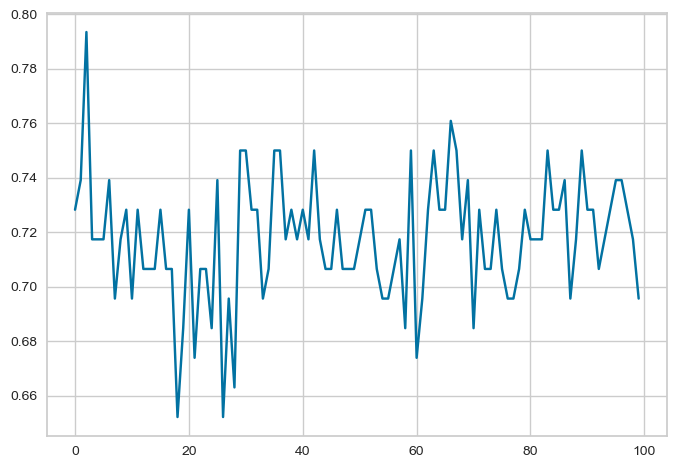

In [60]:
plt.plot(history.history['val_accuracy']);
# Doğrulama (validation) doğruluk değerlerini çizer; modelin aşırı öğrenip öğrenmediğini anlamak için kullanılır

### _Results and Model Performance_

_Bu projede, UCI Heart Disease veri seti kullanılarak bireylerde kalp hastalığı
varlığını tahmin etmek amacıyla çeşitli makine öğrenmesi ve derin öğrenme
modelleri uygulanmıştır._

_Makine öğrenmesi aşamasında Logistic Regression, Decision Tree, K-Nearest
Neighbors, AdaBoost, Gradient Boosting, Gaussian Naive Bayes ve Random Forest
algoritmaları değerlendirilmiştir. Modeller; accuracy, precision, recall ve
F1-score metrikleri kullanılarak karşılaştırılmıştır. Bu modeller arasında
Random Forest algoritması yaklaşık **%85 doğruluk** oranı ve **0.87 F1-score** değeri
ile en dengeli performansı göstermiştir._

_Makine öğrenmesi modellerine ek olarak, tabular tıbbi veriler üzerinde derin
öğrenme yaklaşımının performansını gözlemlemek amacıyla bir Yapay Sinir Ağı
(Artificial Neural Network) modeli geliştirilmiştir. Oluşturulan derin öğrenme
modeli, çok katmanlı tam bağlantılı (Dense) katmanlardan oluşmakta olup,
çıktı katmanında ikili sınıflandırma için sigmoid aktivasyon fonksiyonu
kullanılmıştır._

_Derin öğrenme modeli sonucunda **%96.8 doğruluk (accuracy)** elde edilmiştir.
Bu sonuç, modelin veri seti içerisindeki karmaşık ve doğrusal olmayan
ilişkileri başarılı bir şekilde öğrenebildiğini göstermektedir._

_**Derin Öğrenme Modeli Mimarisi**_

_Bu projede kullanılan yapay sinir ağı modeli, birden fazla gizli katmandan
oluşan ileri beslemeli (feed-forward) bir sinir ağıdır. Gizli katmanlarda
ReLU aktivasyon fonksiyonu kullanılarak modele doğrusal olmayan öğrenme
yeteneği kazandırılmıştır._

_Çıkış katmanında sigmoid aktivasyon fonksiyonu tercih edilerek modelin
0 ile 1 arasında olasılık üretmesi sağlanmıştır. Model, binary cross-entropy
kayıp fonksiyonu ve Adam optimizasyon algoritması kullanılarak eğitilmiştir.
Bu yapı sayesinde model, kalp hastalığına etki eden klinik özellikleri
etkili bir biçimde öğrenebilmiştir._

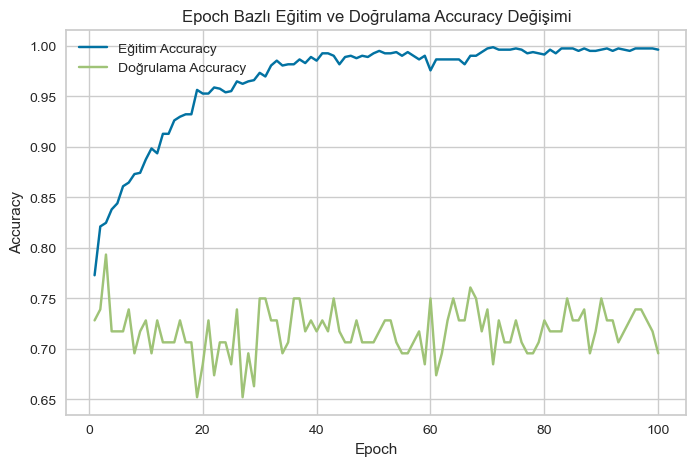

In [61]:
# Accuracy değerleri
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_acc, label='Eğitim Accuracy')
plt.plot(epochs, val_acc, label='Doğrulama Accuracy')

plt.title('Epoch Bazlı Eğitim ve Doğrulama Accuracy Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

_Eğitim sürecinde modelin doğruluk oranı epoch sayısı arttıkça hızlı bir şekilde yükselerek %99 seviyelerine ulaşmıştır. Buna karşın doğrulama doğruluğu %70–75 bandında dalgalı bir seyir izlemiştir. Bu durum, modelin eğitim verisini çok iyi öğrenmesine rağmen doğrulama verisine genelleme konusunda sınırlı kaldığını göstermektedir. Ancak test verisi üzerinde elde edilen %96.84 doğruluk oranı, modelin genel performansının başarılı olduğunu ortaya koymaktadır. Veri setinin görece küçük olması ve doğrulama kümesinin sınırlı örnek içermesi, doğrulama doğruluğundaki dalgalanmaların temel nedeni olarak değerlendirilmektedir._